# House Price Prediction Regression Project

    Predict the price of the a house by its features.If yur are buy or seller of the house but you don't know the exact price of the house ,so supervised learning regression algorithms can help you to predict the price of the house just provideing features of the target house.

## load Modules / Libraries

In [142]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

from pandas.api.types import CategoricalDtype

from sklearn.preprocessing import StandardScaler

## Load Dataset

In [2]:
train_data_path = r"C:\Users\niket\House_Price_Prediction\train.csv" # r -> Rowstring
test_data_path = r"C:\Users\niket\House_Price_Prediction\test.csv"

df_train=pd.read_csv(train_data_path)
df_test=pd.read_csv(test_data_path)

In [3]:
print("Shape of df_train: ",df_train.shape)
print("Shape of df_test: ",df_test.shape)

Shape of df_train:  (1460, 81)
Shape of df_test:  (1459, 80)


In [4]:
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

In [5]:
df_train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_test.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


## Know Your Data

    Analysis Data -> Features
    
    Neighborhood
    OverallQual
    OverallCond
    YearBuilt
    Foundation
    Electrical
    KitchenQual
    GarageType
    GarageFinish
    Fence

## Data Integration

In [7]:
df = pd.concat([df_train,df_test])

print("Shape of Integration DataFrame:",df.shape)

Shape of Integration DataFrame: (2919, 81)


In [8]:
df.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0


In [9]:
df.tail(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,None,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN
1458,2919,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN


## Get the Brief Information of Dataset

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 0 to 1458
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             2919 non-null   int64  
 1   MSSubClass     2919 non-null   int64  
 2   MSZoning       2915 non-null   object 
 3   LotFrontage    2433 non-null   float64
 4   LotArea        2919 non-null   int64  
 5   Street         2919 non-null   object 
 6   Alley          198 non-null    object 
 7   LotShape       2919 non-null   object 
 8   LandContour    2919 non-null   object 
 9   Utilities      2917 non-null   object 
 10  LotConfig      2919 non-null   object 
 11  LandSlope      2919 non-null   object 
 12  Neighborhood   2919 non-null   object 
 13  Condition1     2919 non-null   object 
 14  Condition2     2919 non-null   object 
 15  BldgType       2919 non-null   object 
 16  HouseStyle     2919 non-null   object 
 17  OverallQual    2919 non-null   int64  
 18  OverallC

In [11]:
# Integer value

int_features = df.select_dtypes(include=['int64']).columns

print("Total number of integer features : ",int_features.shape[0])

print("Integer feature names: ",int_features.tolist())

Total number of integer features :  26
Integer feature names:  ['Id', 'MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold']


In [12]:
# Float value

float_features = df.select_dtypes(include=['float64']).columns

print("Total number of flaot features : ",float_features.shape[0])

print("float feature names: ",float_features.tolist())

Total number of flaot features :  12
float feature names:  ['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'SalePrice']


In [13]:
# object value

cat_features = df.select_dtypes(include=['object']).columns

print("Total number of object features : ",cat_features.shape[0])

print("object feature names: ",cat_features.tolist())

Total number of object features :  43
object feature names:  ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


## Get the Statistical Information of Numerical Features

In [14]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,2919.000000,2919.000000,2433.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2896.000000,2918.000000,2918.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2917.000000,2917.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2760.000000,2918.000000,2918.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,2919.000000,1460.000000
mean,1460.000000,57.137718,69.305795,10168.114080,6.089072,5.564577,1971.312778,1984.264474,102.201312,441.423235,49.582248,560.772104,1051.777587,1159.581706,336.483727,4.694416,1500.759849,0.429894,0.061364,1.568003,0.380267,2.860226,1.044536,6.451524,0.597122,1978.113406,1.766621,472.874572,93.709832,47.486811,23.098321,2.602261,16.062350,2.251799,50.825968,6.213087,2007.792737,180921.195890
std,842.787043,42.517628,23.344905,7886.996359,1.409947,1.113131,30.291442,20.894344,179.334253,455.610826,169.205611,439.543659,440.766258,392.362079,428.701456,46.396825,506.051045,0.524736,0.245687,0.552969,0.502872,0.822693,0.214462,1.569379,0.646129,25.574285,0.761624,215.394815,126.526589,67.575493,64.244246,25.188169,56.184365,35.663946,567.402211,2.714762,1.314964,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1895.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,730.500000,20.000000,59.000000,7478.000000,5.000000,5.000000,1953.500000,1965.000000,0.000000,0.000000,0.000000,220.000000,793.000000,876.000000,0.000000,0.000000,1126.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1960.000000,1.000000,320.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129975.000000
50%,1460.000000,50.000000,68.000000,9453.000000,6.000000,5.000000,1973.000000,1993.000000,0.000000,368.500000,0.000000,467.000000,989.500000,1082.000000,0.000000,0.000000,1444.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1979.000000,2.000000,480.000000,0.000000,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,2189.500000,70.000000,80.000000,11570.000000,7.000000,6.000000,2001.000000,2004.000000,164.000000,733.000000,0.000000,805.500000,1302.000000,1387.500000,704.000000,0.000000,1743.500000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2919.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1526.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,5642.000000,3.000000,2.000000,4.000000,2.000000,8.000000,3.000000,15.000000,4.000000,2207.000000,5.000000,1488.000000,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000


In [15]:
df.describe().shape

(8, 38)

### What are the Methods to Handle Missing Values?

    1.Ignore missing values row/ Delete row
    2.Fill missing value manually
    3.Global Constant
    4.Measure of Central Tendency (Mean,Midian,Mode).
    5.Measure of Central Tendency of Each class.
    6.Most Probable value (ML Algorithms)

## Visualise null / Missing Values

<Axes: >

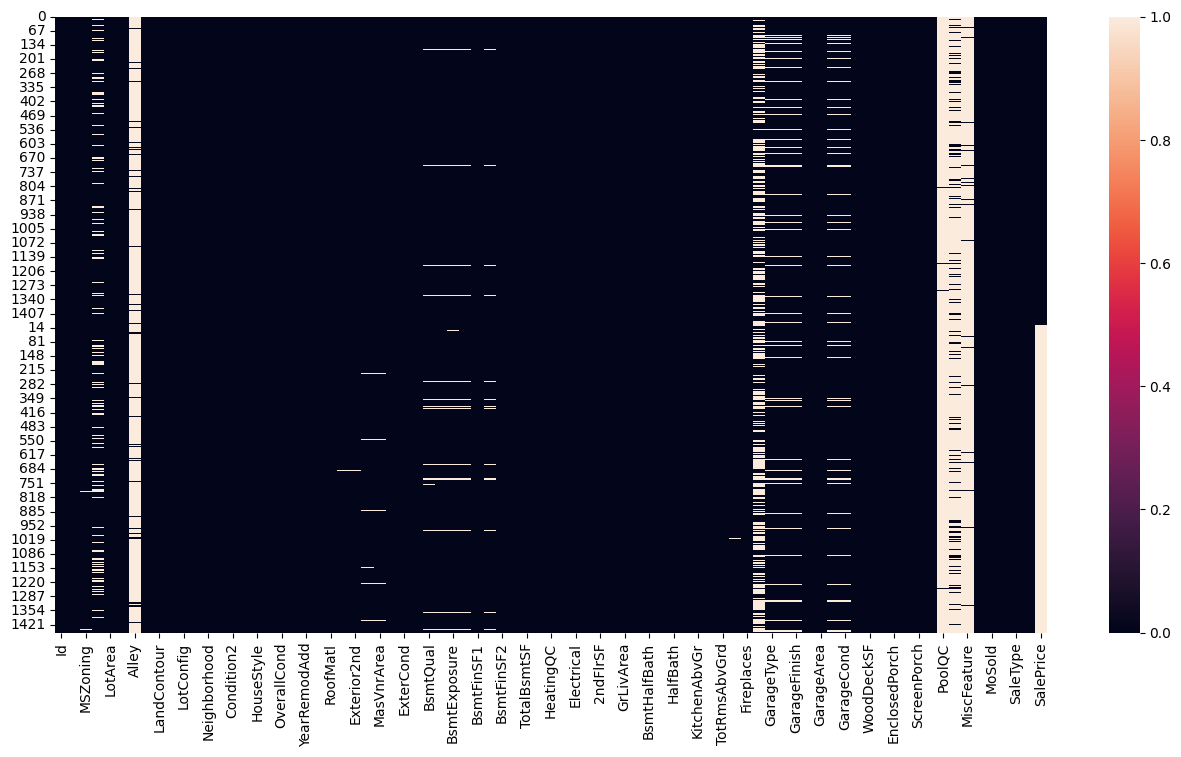

In [16]:
plt.figure(figsize=(16,8))
sns.heatmap(df.isnull())

## Get the null value percentage for every feature

In [17]:
# set index as ID columns

df=df.set_index("Id")

In [18]:
null_count=df.isnull().sum()
null_count

MSSubClass          0
MSZoning            4
LotFrontage       486
LotArea             0
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         24
MasVnrArea         23
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinSF1          1
BsmtFinType2       80
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [19]:
null_percent=df.isnull().sum()/df.shape[0]*100
null_percent


MSSubClass        0.000000
MSZoning          0.137033
LotFrontage      16.649538
LotArea           0.000000
Street            0.000000
Alley            93.216855
LotShape          0.000000
LandContour       0.000000
Utilities         0.068517
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.034258
Exterior2nd       0.034258
MasVnrType        0.822199
MasVnrArea        0.787941
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinSF1        0.034258
BsmtFinType2      2.740665
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
T

## Drop Columns /Features

       As per observation we will not drop any feature from dataset

In [20]:
"""As per domain Knowlege we will not those feature ,
instead None value we will add Constant Value 'NA'"""

miss_value_50_perc=null_percent[null_percent >50]
miss_value_50_perc

Alley          93.216855
PoolQC         99.657417
Fence          80.438506
MiscFeature    96.402878
dtype: float64

In [21]:
miss_value_20_50_perc=null_percent[(null_percent >20) & (null_percent <51)]
miss_value_20_50_perc

FireplaceQu    48.646797
SalePrice      49.982871
dtype: float64

In [22]:
miss_value_5_20_perc=null_percent[(null_percent >5) & (null_percent <21)]
miss_value_5_20_perc

LotFrontage     16.649538
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
dtype: float64

In [23]:
df["LotFrontage"].value_counts().head()

60.0    276
80.0    137
70.0    133
50.0    117
75.0    105
Name: LotFrontage, dtype: int64

<Axes: ylabel='Id'>

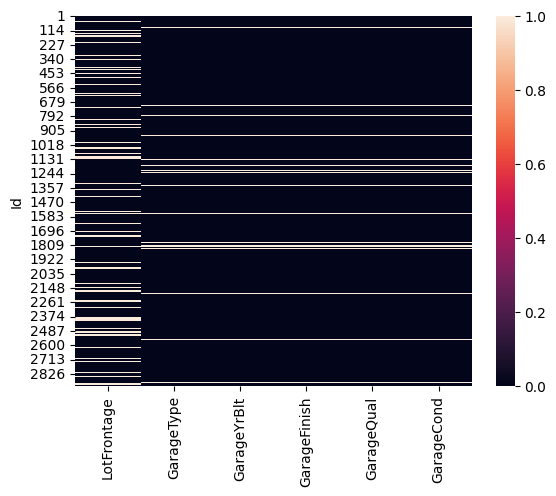

In [24]:
sns.heatmap(df[miss_value_5_20_perc.keys()].isnull())

## Missing Value Imputation

In [25]:
missing_value_feat= null_percent[null_percent > 0]
print("Total null value : ",len(missing_value_feat))

Total null value :  35


In [26]:
missing_value_feat

MSZoning         0.137033
LotFrontage     16.649538
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
MasVnrArea       0.787941
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinSF1       0.034258
BsmtFinType2     2.740665
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
Electrical       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageYrBlt      5.447071
GarageFinish     5.447071
GarageCars       0.034258
GarageArea       0.034258
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
SalePrice       49.982871
dtype: float64

In [27]:
missing_value_feat.keys().isin(cat_features)

array([ True, False,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True, False,  True, False, False, False,  True,
       False, False,  True,  True,  True,  True, False,  True, False,
       False,  True,  True,  True,  True,  True,  True, False])

# cat_na_feat=missing_value_feat[missing_value_feat.keys().isin(cat_features)]
print("Total number of categorical missing features =",len(cat_na_feat))
cat_na_feat

In [28]:
cat_na_feat=missing_value_feat[missing_value_feat.keys().isin(cat_features)]
print("Total number of integer missing features =",len(cat_na_feat))
cat_na_feat

Total number of integer missing features = 23


MSZoning         0.137033
Alley           93.216855
Utilities        0.068517
Exterior1st      0.034258
Exterior2nd      0.034258
MasVnrType       0.822199
BsmtQual         2.774923
BsmtCond         2.809181
BsmtExposure     2.809181
BsmtFinType1     2.706406
BsmtFinType2     2.740665
Electrical       0.034258
KitchenQual      0.034258
Functional       0.068517
FireplaceQu     48.646797
GarageType       5.378554
GarageFinish     5.447071
GarageQual       5.447071
GarageCond       5.447071
PoolQC          99.657417
Fence           80.438506
MiscFeature     96.402878
SaleType         0.034258
dtype: float64

In [29]:
float_na_feat=missing_value_feat[missing_value_feat.keys().isin(float_features)]
print("Total number of float   missing features =",len(float_na_feat))
float_na_feat

Total number of float   missing features = 12


LotFrontage     16.649538
MasVnrArea       0.787941
BsmtFinSF1       0.034258
BsmtFinSF2       0.034258
BsmtUnfSF        0.034258
TotalBsmtSF      0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517
GarageYrBlt      5.447071
GarageCars       0.034258
GarageArea       0.034258
SalePrice       49.982871
dtype: float64

## Handling MSZoning         0.137033

In [30]:
df['MSZoning'].value_counts()

RL         2265
RM          460
FV          139
RH           26
C (all)      25
Name: MSZoning, dtype: int64

<Axes: xlabel='count', ylabel='MSZoning'>

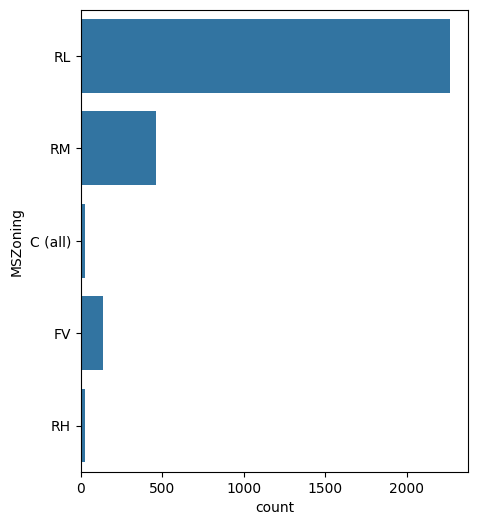

In [31]:
plt.figure(figsize=(5,6))
sns.countplot(df['MSZoning'])

In [32]:
## backup of original data  mvi- missing value impute

df_mvi=df.copy()
df_mvi.shape

(2919, 80)

## Categorical Value 

In [33]:
mszoning_mode=df['MSZoning'].mode()[0]

df_mvi['MSZoning'].replace(np.nan,mszoning_mode,inplace=True)

df_mvi['MSZoning'].isnull().sum()

0

In [34]:
def oldNewCountplot(df,df_new,features):
    plt.subplot(1,2,1)
    sns.countplot(df[features])
    plt.title('old Data Distribution')
    plt.subplot(1,2,2)
    sns.countplot(df_new[features])
    plt.title("New Data Distribution")

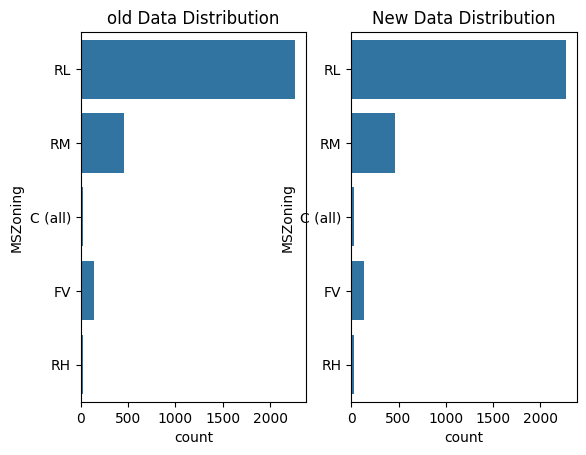

In [35]:
oldNewCountplot(df,df_mvi,'MSZoning')

## Handling  Utilities        0.068517

In [36]:
df["Utilities"].value_counts()

AllPub    2916
NoSeWa       1
Name: Utilities, dtype: int64

In [37]:
utilities_mode=df["Utilities"].mode()[0]
df_mvi["Utilities"].replace(np.nan,utilities_mode,inplace=True)
df_mvi["Utilities"].isnull().sum()

0

### Handling Exterior1st      0.034258 nd Exterior2nd      0.034258

In [38]:
Exterior1st_mode=df["Exterior1st"].mode()[0]
Exterior2nd_mode=df["Exterior2nd"].mode()[0]

df_mvi["Exterior1st"].replace(np.nan,Exterior1st_mode,inplace=True)
df_mvi["Exterior2nd"].replace(np.nan,Exterior2nd_mode,inplace=True)

print("E1st is null: ",df_mvi["Exterior1st"].isnull().sum())
print("E2nd is null: ",df_mvi["Exterior2nd"].isnull().sum())




E1st is null:  0
E2nd is null:  0


## Handling Alley=93.216855

In [39]:
df['Alley'].value_counts()

Grvl    120
Pave     78
Name: Alley, dtype: int64

In [40]:
alley_cont="NA"
df_mvi["Alley"].replace(np.nan,alley_cont,inplace=True)
df_mvi["Alley"].isnull().sum()

0

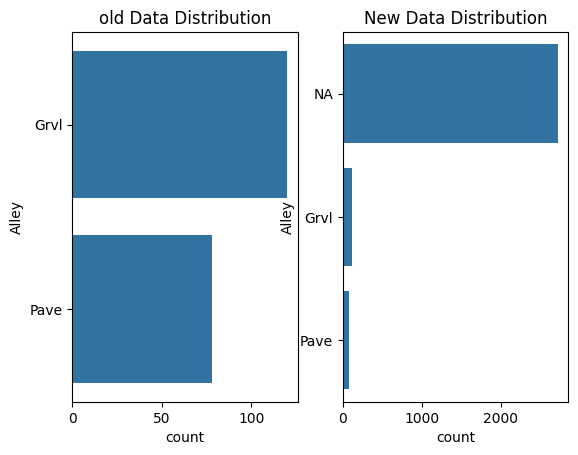

In [41]:
oldNewCountplot(df,df_mvi,"Alley")

## Numerical Value

In [42]:
def boxhistplot(df,figsize=(12,6)):
    plt.figure(figsize=figsize)
    plt.subplot(1,2,1)
    sns.boxplot(df)
    plt.subplot(1,2,2)
    sns.distplot(df)

C:\Users\niket\AppData\Local\Temp\ipykernel_28164\4044913490.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


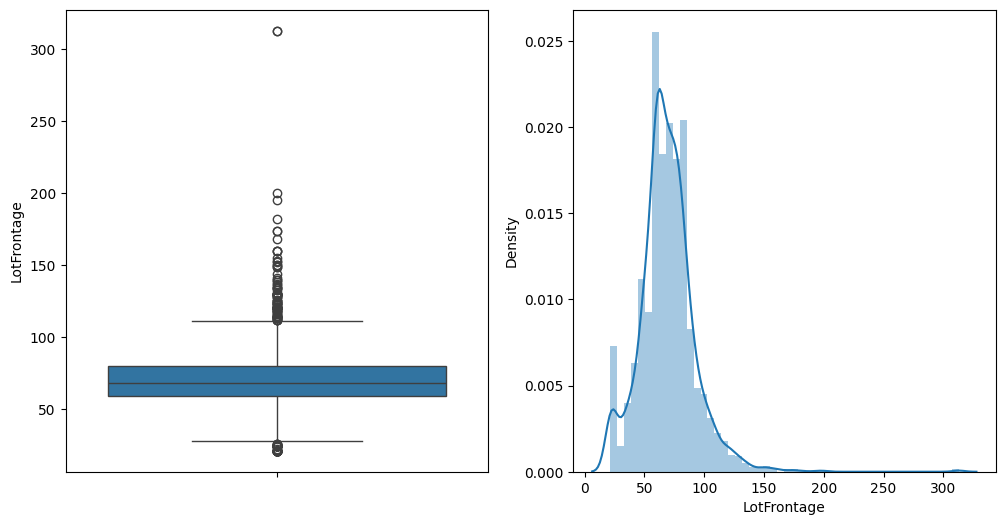

In [43]:
boxhistplot(df["LotFrontage"])

In [44]:
LotFrontage_mean=df["LotFrontage"].mean()

df_mvi["LotFrontage"].replace(np.nan,LotFrontage_mean,inplace=True)

In [45]:
df_mvi["LotFrontage"].isnull().sum()

0

In [46]:
def oldNewBoxHistplot(df,df_new,features,figsize=(16,10)):
    plt.figure(figsize=figsize)
    plt.subplot(2,2,1)
    sns.boxplot(df[features])
    plt.title('old Data Distribution')
    plt.subplot(2,2,2)
    sns.distplot(df[features])
    plt.title("old Data Distribution")

    plt.subplot(2,2,3)
    sns.boxplot(df_new[features])
    plt.title("New Data Distribution")

    plt.subplot(2,2,4)
    sns.distplot(df_new[features])
    plt.title("New Data Distribution")

C:\Users\niket\AppData\Local\Temp\ipykernel_28164\3365668161.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[features])
C:\Users\niket\AppData\Local\Temp\ipykernel_28164\3365668161.py:15: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_new[features])


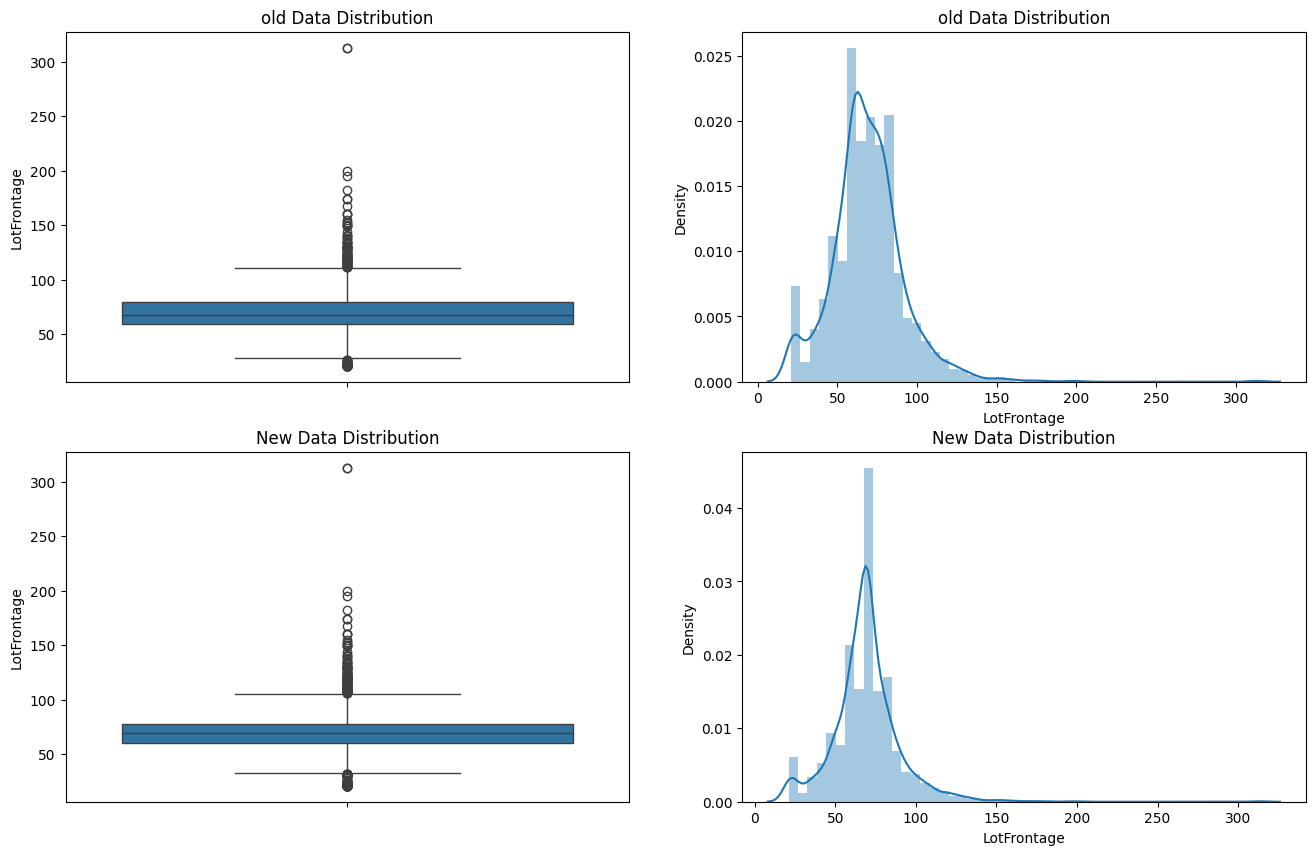

In [47]:
oldNewBoxHistplot(df,df_mvi,"LotFrontage")

## Handling MasVnrType       0.822199 And MasVnrArea       0.787941


<Axes: ylabel='Id'>

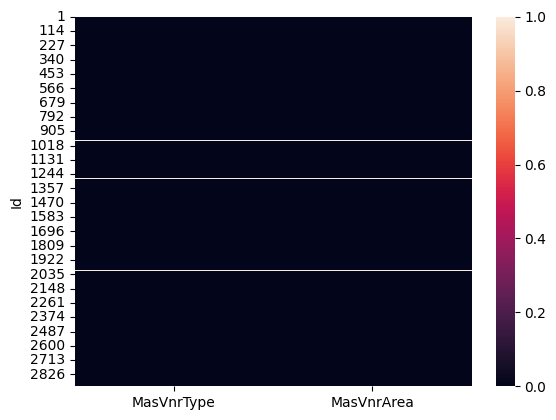

In [48]:
sns.heatmap(df[["MasVnrType","MasVnrArea"]].isnull())


In [49]:
df[df[["MasVnrType","MasVnrArea"]].isnull().any(axis=1)]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
235,60,RL,NaN,7851,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,625.0,Unf,0.0,235.0,860.0,GasA,Ex,Y,SBrkr,860,1100,0,1960,1.0,0.0,2,1,4,1,Gd,8,Typ,2,TA,BuiltIn,2002.0,Fin,2.0,440.0,TA,TA,Y,288,48,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,216500.0
530,20,RL,NaN,32668,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,Crawfor,Norm,Norm,1Fam,1Story,6,3,1957,1975,Hip,CompShg,Wd Sdng,Stone,NaN,NaN,Gd,TA,PConc,TA,TA,No,Rec,1219.0,Unf,0.0,816.0,2035.0,GasA,TA,Y,SBrkr,2515,0,0,2515,1.0,0.0,3,0,4,2,TA,9,Maj1,2,TA,Attchd,1975.0,RFn,2.0,484.0,TA,TA,Y,0,0,200,0,0,0,NaN,NaN,NaN,0,3,2007,WD,Alloca,200624.0
651,60,FV,65.0,8125,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,7,6,2007,2007,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,813.0,813.0,GasA,Ex,Y,SBrkr,822,843,0,1665,0.0,0.0,2,1,3,1,Gd,7,Typ,0,NaN,Attchd,2007.0,RFn,2.0,562.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,5,2008,WD,Normal,205950.0
937,20,RL,67.0,10083,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NaN,NaN,NaN,0,8,2009,WD,Normal,184900.0
974,20,FV,95.0,11639,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2007,2008,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,1428.0,1428.0,GasA,Ex,Y,SBrkr,1428,0,0,1428,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,2007.0,Fin,2.0,480.0,TA,TA,Y,0,120,0,0,0,0,NaN,NaN,NaN,0,12,2008,New,Partial,182000.0
978,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,NaN,Attchd,2007.0,Fin,2.0,569.0,TA,TA,Y,0,116,0,0,0,0,NaN,NaN,NaN,0,11,2007,New,Partial,199900.0
1244,20,RL,107.0,13891,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,NaN,NaN,NaN,0,9,2006,New,Partial,465000.0
1279,60,RL,75.0,9473,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,0,211,0,0,0,0,NaN,NaN,NaN,0,3,2008,WD,Normal,237000.0
1692,60,RL,NaN,12891,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Gilbert,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,651.0,Unf,0.0,219.0,870.0,GasA,Ex,Y,SBrkr,878,1126,0,2004,1.0,0.0,2,1,4,1,Gd,8,Typ,1,Gd,BuiltIn,2002.0,Fin,3.0,644.0,TA,TA,Y,0,48,0,0,0,0,NaN,NaN,NaN,0,7,2009,WD,Nor

In [50]:
df["MasVnrType"].value_counts()


None       1742
BrkFace     879
Stone       249
BrkCmn       25
Name: MasVnrType, dtype: int64

In [51]:
MasVnrType_mode=df['MasVnrType'].mode()[0]

df_mvi['MasVnrType'].replace(np.nan,MasVnrType_mode,inplace=True)

df_mvi['MasVnrType'].isnull().sum()

0

C:\Users\niket\AppData\Local\Temp\ipykernel_28164\4044913490.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df)


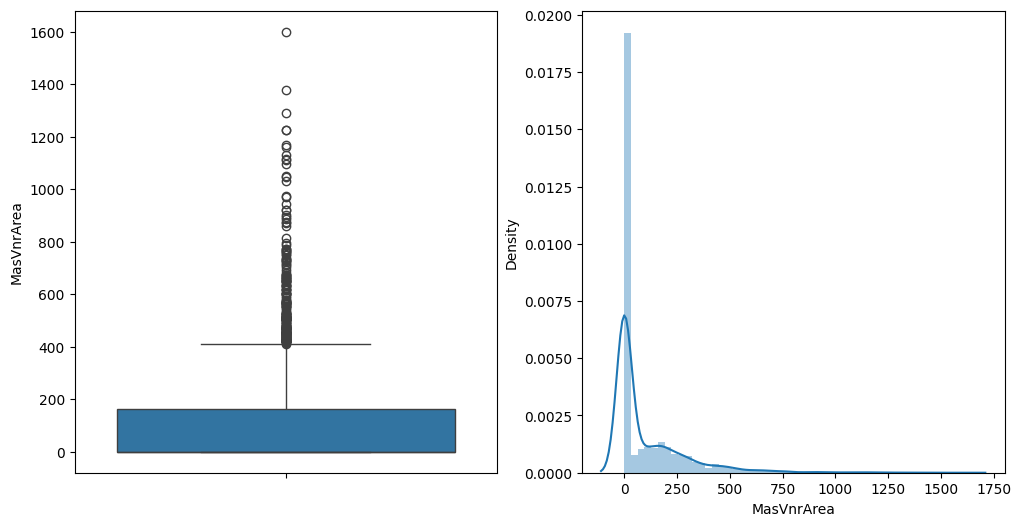

In [52]:
boxhistplot(df["MasVnrArea"])


In [53]:
MasVnrArea_constant=0

df_mvi['MasVnrArea'].replace(np.nan,MasVnrArea_constant,inplace=True)

df_mvi['MasVnrArea'].isnull().sum()

0

## Handling bsmt Features

In [54]:
""""cat_bsmt_feat=

BsmtQual          2.774923
BsmtCond          2.809181
BsmtExposure      2.809181
BsmtFinType1      2.706406
BsmtFinType2      2.740665

num_bsmt_feat=
BsmtFinSF1        0.034258
BsmtFinSF2        0.034258
BsmtUnfSF         0.034258
TotalBsmtSF       0.034258
BsmtFullBath     0.068517
BsmtHalfBath     0.068517"""

'"cat_bsmt_feat=\n\nBsmtQual          2.774923\nBsmtCond          2.809181\nBsmtExposure      2.809181\nBsmtFinType1      2.706406\nBsmtFinType2      2.740665\n\nnum_bsmt_feat=\nBsmtFinSF1        0.034258\nBsmtFinSF2        0.034258\nBsmtUnfSF         0.034258\nTotalBsmtSF       0.034258\nBsmtFullBath     0.068517\nBsmtHalfBath     0.068517'

In [55]:
cat_bsmt_feat=[

"BsmtQual",          
"BsmtCond",          
"BsmtExposure" ,     
"BsmtFinType1",      
"BsmtFinType2" ]     

num_bsmt_feat=[

"BsmtFinSF1" ,      
"BsmtFinSF2",        
"BsmtUnfSF",        
"TotalBsmtSF",       
"BsmtFullBath" ,   
"BsmtHalfBath"
]   

<Axes: ylabel='Id'>

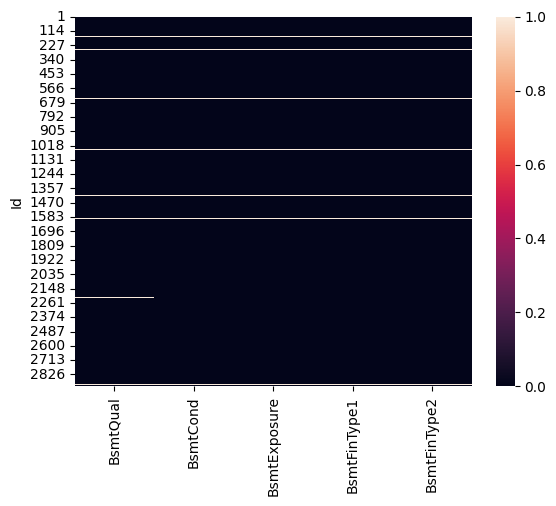

In [56]:
sns.heatmap(df[cat_bsmt_feat].isnull())

In [57]:
for feat in cat_bsmt_feat:
    print(f"value count of {feat}: {df[feat].value_counts()}")

value count of BsmtQual: TA    1283
Gd    1209
Ex     258
Fa      88
Name: BsmtQual, dtype: int64
value count of BsmtCond: TA    2606
Gd     122
Fa     104
Po       5
Name: BsmtCond, dtype: int64
value count of BsmtExposure: No    1904
Av     418
Gd     276
Mn     239
Name: BsmtExposure, dtype: int64
value count of BsmtFinType1: Unf    851
GLQ    849
ALQ    429
Rec    288
BLQ    269
LwQ    154
Name: BsmtFinType1, dtype: int64
value count of BsmtFinType2: Unf    2493
Rec     105
LwQ      87
BLQ      68
ALQ      52
GLQ      34
Name: BsmtFinType2, dtype: int64


In [58]:
bsmt_cont="NA"
for feat in cat_bsmt_feat:
    df_mvi[feat].replace(np.nan,bsmt_cont,inplace=True)

In [59]:
df_mvi[cat_bsmt_feat]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2
Id,,,,,
1,Gd,TA,No,GLQ,Unf
2,Gd,TA,Gd,ALQ,Unf
3,Gd,TA,Mn,GLQ,Unf
4,TA,Gd,No,ALQ,Unf
5,Gd,TA,Av,GLQ,Unf
6,Gd,TA,No,GLQ,Unf
7,Ex,TA,Av,GLQ,Unf
8,Gd,TA,Mn,ALQ,BLQ
9,TA,TA,No,Unf,Unf


In [60]:
df_mvi[cat_bsmt_feat].isnull().sum()


BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
dtype: int64

<Axes: ylabel='Id'>

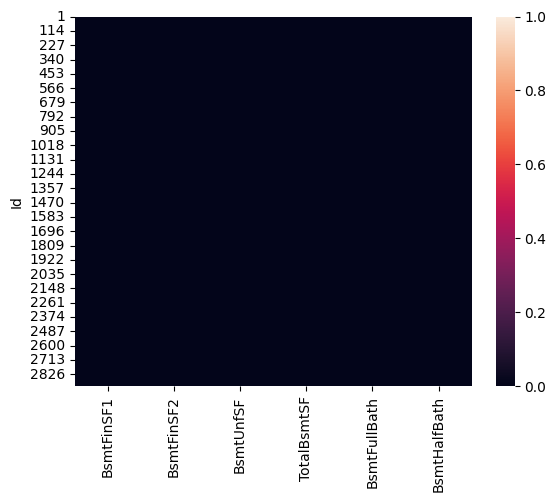

In [61]:
sns.heatmap(df[num_bsmt_feat].isnull())

In [62]:
df_bsmt=df[cat_bsmt_feat+num_bsmt_feat]
df_bsmt[df_bsmt.isnull().any(axis=1)]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
Id,,,,,,,,,,,
18,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
40,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
91,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
103,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
157,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
183,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
260,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0
333,Gd,TA,No,GLQ,NaN,1124.0,479.0,1603.0,3206.0,1.0,0.0
343,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0


In [63]:
bsmt_num=0
for feat in num_bsmt_feat:
    df_mvi[feat].replace(np.nan,bsmt_num,inplace=True)

In [64]:
df_mvi[num_bsmt_feat].isnull().sum()

BsmtFinSF1      0
BsmtFinSF2      0
BsmtUnfSF       0
TotalBsmtSF     0
BsmtFullBath    0
BsmtHalfBath    0
dtype: int64

##  Handling Electrical       0.034258  KitchenQual      0.034258

In [65]:
df["Electrical"].value_counts()

SBrkr    2671
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: Electrical, dtype: int64

In [66]:
df["KitchenQual"].value_counts()

TA    1492
Gd    1151
Ex     205
Fa      70
Name: KitchenQual, dtype: int64

In [67]:
df_ekk=df[["Electrical","KitchenQual","KitchenAbvGr"]]
df_ekk[df_ekk.isnull().any(axis=1)]

,Electrical,KitchenQual,KitchenAbvGr
Id,,,
1380,NaN,Gd,1
1556,SBrkr,NaN,1


In [68]:
Electrical_mode=df['Electrical'].mode()[0]

df_mvi['Electrical'].replace(np.nan,Electrical_mode,inplace=True)

df_mvi['Electrical'].isnull().sum()

0

In [69]:
KitchenQual_mode=df['KitchenQual'].mode()[0]

df_mvi['KitchenQual'].replace(np.nan,KitchenQual_mode,inplace=True)

df_mvi['KitchenQual'].isnull().sum()

0

## Handling Remaining cat features

In [70]:
#Functional        0.068517 mode
#FireplaceQu      48.646797 Na
#PoolArea          0.000000 na
#PoolQC           99.657417  na
#Fence            80.438506 na
#SaleType         0.034258 mode

In [71]:
df["Functional"].value_counts()

Typ     2717
Min2      70
Min1      65
Mod       35
Maj1      19
Maj2       9
Sev        2
Name: Functional, dtype: int64

In [72]:
Functional_mode=df['Functional'].mode()[0]

df_mvi['Functional'].replace(np.nan,Functional_mode,inplace=True)

df_mvi['Functional'].isnull().sum()

0

In [73]:
df["SaleType"].value_counts()


WD       2525
New       239
COD        87
ConLD      26
CWD        12
ConLI       9
ConLw       8
Oth         7
Con         5
Name: SaleType, dtype: int64

In [74]:
SaleType_mode=df['SaleType'].mode()[0]

df_mvi['SaleType'].replace(np.nan,SaleType_mode,inplace=True)

df_mvi['SaleType'].isnull().sum()

0

In [75]:
other_cat_feat=[
    "FireplaceQu",      
    "MiscFeature",         
    "PoolQC" ,          
    "Fence"]
for feat in other_cat_feat:
    print(f"value_count of {feat}:{df[feat].value_counts()}")

value_count of FireplaceQu:Gd    744
TA    592
Fa     74
Po     46
Ex     43
Name: FireplaceQu, dtype: int64
value_count of MiscFeature:Shed    95
Gar2     5
Othr     4
TenC     1
Name: MiscFeature, dtype: int64
value_count of PoolQC:Ex    4
Gd    4
Fa    2
Name: PoolQC, dtype: int64
value_count of Fence:MnPrv    329
GdPrv    118
GdWo     112
MnWw      12
Name: Fence, dtype: int64


In [76]:
FireplaceQu_cont="NA"

df_mvi['FireplaceQu'].replace(np.nan,FireplaceQu_cont,inplace=True)

df_mvi['FireplaceQu'].isnull().sum()

0

In [77]:
PoolQC_cont="NA"

df_mvi['PoolQC'].replace(np.nan,PoolQC_cont,inplace=True)

df_mvi['PoolQC'].isnull().sum()

0

In [78]:
Fence_cont="NA"

df_mvi['Fence'].replace(np.nan,Fence_cont,inplace=True)

df_mvi['Fence'].isnull().sum()

0

In [79]:
MiscFeature_cont="NA"

df_mvi['MiscFeature'].replace(np.nan,MiscFeature_cont,inplace=True)

df_mvi['MiscFeature'].isnull().sum()

0

## Handling Garage Features

In [80]:
#GarageType        5.378554 NA
#GarageFinish      5.447071 NA
#GarageQual        5.447071 NA
#GarageCond        5.447071 NA


#GarageYrBlt       5.447071 0
#GarageCars        0.034258  0
#GarageArea        0.034258 0


In [81]:
cat_garage_feat=["GarageType","GarageFinish","GarageQual","GarageCond"]
num_garage_feat=["GarageYrBlt","GarageCars","GarageArea"]

df_garage=df[num_garage_feat + cat_garage_feat]
df_garage[df_garage.isnull().any(axis=1)]

,GarageYrBlt,GarageCars,GarageArea,GarageType,GarageFinish,GarageQual,GarageCond
Id,,,,,,,
40,NaN,0.0,0.0,NaN,NaN,NaN,NaN
49,NaN,0.0,0.0,NaN,NaN,NaN,NaN
79,NaN,0.0,0.0,NaN,NaN,NaN,NaN
89,NaN,0.0,0.0,NaN,NaN,NaN,NaN
90,NaN,0.0,0.0,NaN,NaN,NaN,NaN
100,NaN,0.0,0.0,NaN,NaN,NaN,NaN
109,NaN,0.0,0.0,NaN,NaN,NaN,NaN
126,NaN,0.0,0.0,NaN,NaN,NaN,NaN
128,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [82]:
garage_cont="NA"
for feat in cat_garage_feat:
    df_mvi[feat].replace(np.nan,garage_cont,inplace=True)

df_mvi[cat_garage_feat].isnull().sum()

GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
dtype: int64

In [83]:
garage_num=0
for feat in num_garage_feat:
    df_mvi[feat].replace(np.nan,garage_num,inplace=True)

df_mvi[num_garage_feat].isnull().sum()

GarageYrBlt    0
GarageCars     0
GarageArea     0
dtype: int64

In [84]:
df_mvi.isnull().any(axis=1).sum()   # missing value is show target variable price

1459

##  Feature Transformation
### Convert Numerical Feature to Categorical Feature

In [85]:
for_num_conv=["MSSubClass","YearBuilt","YearRemodAdd","GarageYrBlt","MoSold","YrSold"]
for feat in for_num_conv:
    print(f"{feat}: data type = {df[feat].dtype}")

MSSubClass: data type = int64
YearBuilt: data type = int64
YearRemodAdd: data type = int64
GarageYrBlt: data type = float64
MoSold: data type = int64
YrSold: data type = int64


In [86]:
df_mvi[for_num_conv].head()

,MSSubClass,YearBuilt,YearRemodAdd,GarageYrBlt,MoSold,YrSold
Id,,,,,,
1,60,2003,2003,2003.0,2,2008
2,20,1976,1976,1976.0,5,2007
3,60,2001,2002,2001.0,9,2008
4,70,1915,1970,1998.0,2,2006
5,60,2000,2000,2000.0,12,2008


In [87]:
df_mvi["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [88]:
calendar.month_abbr[2]

'Feb'

In [89]:
df_mvi["MoSold"]=df_mvi["MoSold"].apply(lambda x:calendar.month_abbr[x])
df_mvi["MoSold"].unique()

array(['Feb', 'May', 'Sep', 'Dec', 'Oct', 'Aug', 'Nov', 'Apr', 'Jan',
       'Jul', 'Mar', 'Jun'], dtype=object)

In [90]:
for feat in for_num_conv:
    df_mvi[feat]=df_mvi[feat].astype(str)

In [91]:
for feat in for_num_conv:
    print(f"{feat}: data types ={df_mvi[feat].dtype}")

MSSubClass: data types =object
YearBuilt: data types =object
YearRemodAdd: data types =object
GarageYrBlt: data types =object
MoSold: data types =object
YrSold: data types =object


 ## Convert Categorical Features into Numerical Features
 ### Ordinal Encoding

In [92]:
ordinal_encod_var=[
"ExterQual",
"ExterCond",
"BsmtQual",
"BsmtCond",
"BsmtExposure",
"BsmtFinType1",
"BsmtFinSF1",
"BsmtFinType2",
"HeatingQC",
"KitchenQual",
"FireplaceQu",
"GarageQual",
"GarageCond",
"PoolQC",
"Functional",
"PavedDrive",
"GarageFinish",
"Utilities"
]

print("Total number of feature to convert numerical format:",len(ordinal_encod_var))

Total number of feature to convert numerical format: 18


In [93]:
df_mvi["ExterQual"].value_counts()

TA    1798
Gd     979
Ex     107
Fa      35
Name: ExterQual, dtype: int64

In [120]:
cat_type = CategoricalDtype(categories=["Po", "Fa", "Ta", "Gd", "Ex"], ordered=True)
df_mvi["ExterQual"] = df_mvi["ExterQual"].astype(cat_type).cat.codes

In [121]:
print(df_mvi["ExterQual"].unique()) 


[-1]


In [96]:
df_mvi["BsmtExposure"].value_counts()


No    1904
Av     418
Gd     276
Mn     239
NA      82
Name: BsmtExposure, dtype: int64

In [97]:
df_mvi["BsmtExposure"]=df_mvi["BsmtExposure"].astype(CategoricalDtype(categories=["NA","No","Mn","Av","Gd"],ordered=True)).cat.codes

In [98]:
df_mvi["BsmtExposure"].value_counts()


1    1904
3     418
4     276
2     239
0      82
Name: BsmtExposure, dtype: int64

In [99]:
df_mvi["BsmtExposure"].unique()

array([1, 4, 2, 3, 0], dtype=int8)

In [100]:
df_mvi["BsmtCond"]=df_mvi["BsmtCond"].astype(CategoricalDtype(categories=["Po","Fa","TA","Gd","Ex"],ordered=True)).cat.codes

In [112]:
df_mvi["ExterCond"].unique()

array([-1], dtype=int8)

In [101]:
df_mvi['ExterCond'] = df_mvi['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes


In [102]:
df_mvi["PoolQC"].unique()

array(['NA', 'Ex', 'Fa', 'Gd'], dtype=object)

In [103]:
df_mvi['BsmtFinType1'] =df_mvi['BsmtFinType1'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_mvi['BsmtFinType2'] = df_mvi['BsmtFinType2'].astype(CategoricalDtype(categories=['NA', 'Unf', 'LwQ', 'Rec', 'BLQ','ALQ', 'GLQ'], ordered = True)).cat.codes
df_mvi['BsmtQual'] =df_mvi['BsmtQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['ExterQual'] = df_mvi['ExterQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['ExterCond'] = df_mvi['ExterCond'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['Functional'] = df_mvi['Functional'].astype(CategoricalDtype(categories=['Sal', 'Sev', 'Maj2', 'Maj1', 'Mod','Min2','Min1', 'Typ'], ordered = True)).cat.codes
df_mvi['GarageCond'] = df_mvi['GarageCond'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['GarageQual'] = df_mvi['GarageQual'].astype(CategoricalDtype(categories=['NA', 'Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['GarageFinish'] = df_mvi['GarageFinish'].astype(CategoricalDtype(categories=['NA', 'Unf', 'RFn', 'Fin'], ordered = True)).cat.codes
df_mvi['HeatingQC'] = df_mvi['HeatingQC'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['KitchenQual'] = df_mvi['KitchenQual'].astype(CategoricalDtype(categories=['Po', 'Fa', 'TA', 'Gd', 'Ex'], ordered = True)).cat.codes
df_mvi['PavedDrive'] = df_mvi['PavedDrive'].astype(CategoricalDtype(categories=['N', 'P', 'Y'], ordered = True)).cat.codes
df_mvi['PoolQC'] = df_mvi['PoolQC'].astype(CategoricalDtype(categories=['NA', 'Ex', 'Fa', 'Gd'], ordered = True)).cat.codes
df_mvi['Utilities'] = df_mvi['Utilities'].astype(CategoricalDtype(categories=['ELO', 'NASeWa', 'NASeWr', 'AllPub'], ordered = True)).cat.codes

In [104]:
df_mvi.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   object 
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2919 non-null   int8   
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

## One Hot Encoding for Nominal Categorical Data

In [128]:
df_encoding=df_mvi.copy()

object_features = df_encoding.select_dtypes(include="object").columns.tolist()
print("Total object data type features: ",len(object_features))

print("Features: \n",object_features)

Total object data type features:  33
Features: 
 ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'Foundation', 'Heating', 'CentralAir', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'Fence', 'MiscFeature', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition']


In [129]:
df_encoding[object_features].head(3)

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,Foundation,Heating,CentralAir,Electrical,FireplaceQu,GarageType,GarageYrBlt,Fence,MiscFeature,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,60,RL,Pave,NA,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,NA,Attchd,2003.0,NA,NA,Feb,2008,WD,Normal
2,20,RL,Pave,NA,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,CBlock,GasA,Y,SBrkr,TA,Attchd,1976.0,NA,NA,May,2007,WD,Normal
3,60,RL,Pave,NA,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,PConc,GasA,Y,SBrkr,TA,Attchd,2001.0,NA,NA,Sep,2008,WD,Normal


In [131]:
print("Shape of Df before encoding: ",df_encoding.shape)
df_encoding=pd.get_dummies(df_encoding,
                        columns=object_features,
                        prefix=object_features,
                        drop_first=True)
print("shape of DF after encoding :",df_encoding.shape)

Shape of Df before encoding:  (2919, 80)
shape of DF after encoding : (2919, 517)


In [132]:
df_encoding.drop(columns=["ExterQual","ExterCond"],inplace=True)


In [133]:
df_encoding.head(3)

,LotFrontage,LotArea,Utilities,OverallQual,OverallCond,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,MSSubClass_150,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSSubClass_20,MSSubClass_30,MSSubClass_40,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Pave,Alley_NA,Alley_Pave,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LandSlope_Mod,LandSlope_Sev,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,YearBuilt_1875,YearBuilt_1879,YearBuilt_1880,YearBuilt_1882,YearBuilt_1885,YearBuilt_1890,YearBuilt_1892,YearBuilt_1893,YearBuilt_1895,YearBuilt_1896,YearBuilt_1898,YearBuilt_1900,YearBuilt_1901,YearBuilt_1902,YearBuilt_1904,YearBuilt_1905,YearBuilt_1906,YearBuilt_1907,YearBuilt_1908,YearBuilt_1910,YearBuilt_1911,YearBuilt_1912,YearBuilt_1913,YearBuilt_1914,YearBuilt_1915,YearBuilt_1916,YearBuilt_1917,YearBuilt_1918,YearBuilt_1919,YearBuilt_1920,YearBuilt_1921,YearBuilt_1922,YearBuilt_1923,YearBuilt_1924,YearBuilt_1925,YearBuilt_1926,YearBuilt_1927,YearBuilt_1928,YearBuilt_1929,YearBuilt_1930,YearBuilt_1931,YearBuilt_1932,YearBuilt_1934,YearBuilt_1935,YearBuilt_1936,YearBuilt_1937,YearBuilt_1938,YearBuilt_1939,YearBuilt_1940,YearBuilt_1941,YearBuilt_1942,YearBuilt_1945,YearBuilt_1946,YearBuilt_1947,YearBuilt_1948,YearBuilt_1949,YearBuilt_1950,YearBuilt_1951,YearBuilt_1952,YearBuilt_1953,YearBuilt_1954,YearBuilt_1955,YearBuilt_1956,YearBuilt_1957,YearBuilt_1958,YearBuilt_1959,YearBuilt_1960,YearBuilt_1961,YearBuilt_1962,YearBuilt_1963,YearBuilt_1964,YearBuilt_1965,YearBuilt_1966,YearBuilt_1967,YearBuilt_1968,YearBuilt_1969,YearBuilt_1970,YearBuilt_1971,YearBuilt_1972,YearBuilt_1973,YearBuilt_1974,YearBuilt_1975,YearBuilt_1976,YearBuilt_1977,YearBuilt_1978,YearBuilt_1979,YearBuilt_1980,YearBuilt_1981,YearBuilt_1982,YearBuilt_1983,YearBuilt_1984,YearBuilt_1985,YearBuilt_1986,YearBuilt_1987,YearBuilt_1988,YearBuilt_1989,YearBuilt_1990,YearBuilt_1991,YearBuilt_1992,YearBuilt_1993,YearBuilt_1994,YearBuilt_1995,YearBuilt_1996,YearBuilt_1997,YearBuilt_1998,YearBuilt_1999,YearBuilt_2000,YearBuilt_2001,YearBuilt_2002,YearBuilt_2003,YearBuilt_2004,YearBuilt_2005,YearBuilt_2006,YearBuilt_2007,YearBuilt_2008,YearBuilt_2009,YearBuilt_2010,YearRemodAdd_1951,YearRemodAdd_1952,YearRemodAdd_1953,YearRemodAdd_1954,YearRemodAdd_1955,YearRemodAdd_1956,YearRemodAdd_1957,YearRemodAdd_1958,YearRemodAdd_1959,YearRemodAdd_1960,YearRemodAdd_1961,YearRemodAdd_1962,YearRemodAdd_1963,YearRemodAdd_1964,YearRemodAdd_1965,YearRemodAdd_1966,YearRemodAdd_1967,YearRemodAdd_1968,YearRemodAdd_1969,YearRemodAd

## Show skewness of feature with distplot

In [157]:
skewed_features = ['1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'BedroomAbvGr',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtUnfSF',
 'EnclosedPorch',
 'Fireplaces',
 'FullBath',
 'GarageArea',
 'GarageCars',
 'GrLivArea',
 'HalfBath',
 'KitchenAbvGr',
 'LotArea',
 'LotFrontage',
 'LowQualFinSF',
 'MasVnrArea',
 'MiscVal',
 'OpenPorchSF',
 'PoolArea',
 'ScreenPorch',
 'TotRmsAbvGrd',
 'TotalBsmtSF',
 'WoodDeckSF']

In [ ]:
quan == skewed_features

In [167]:
import warnings
warnings.filterwarnings("ignore")

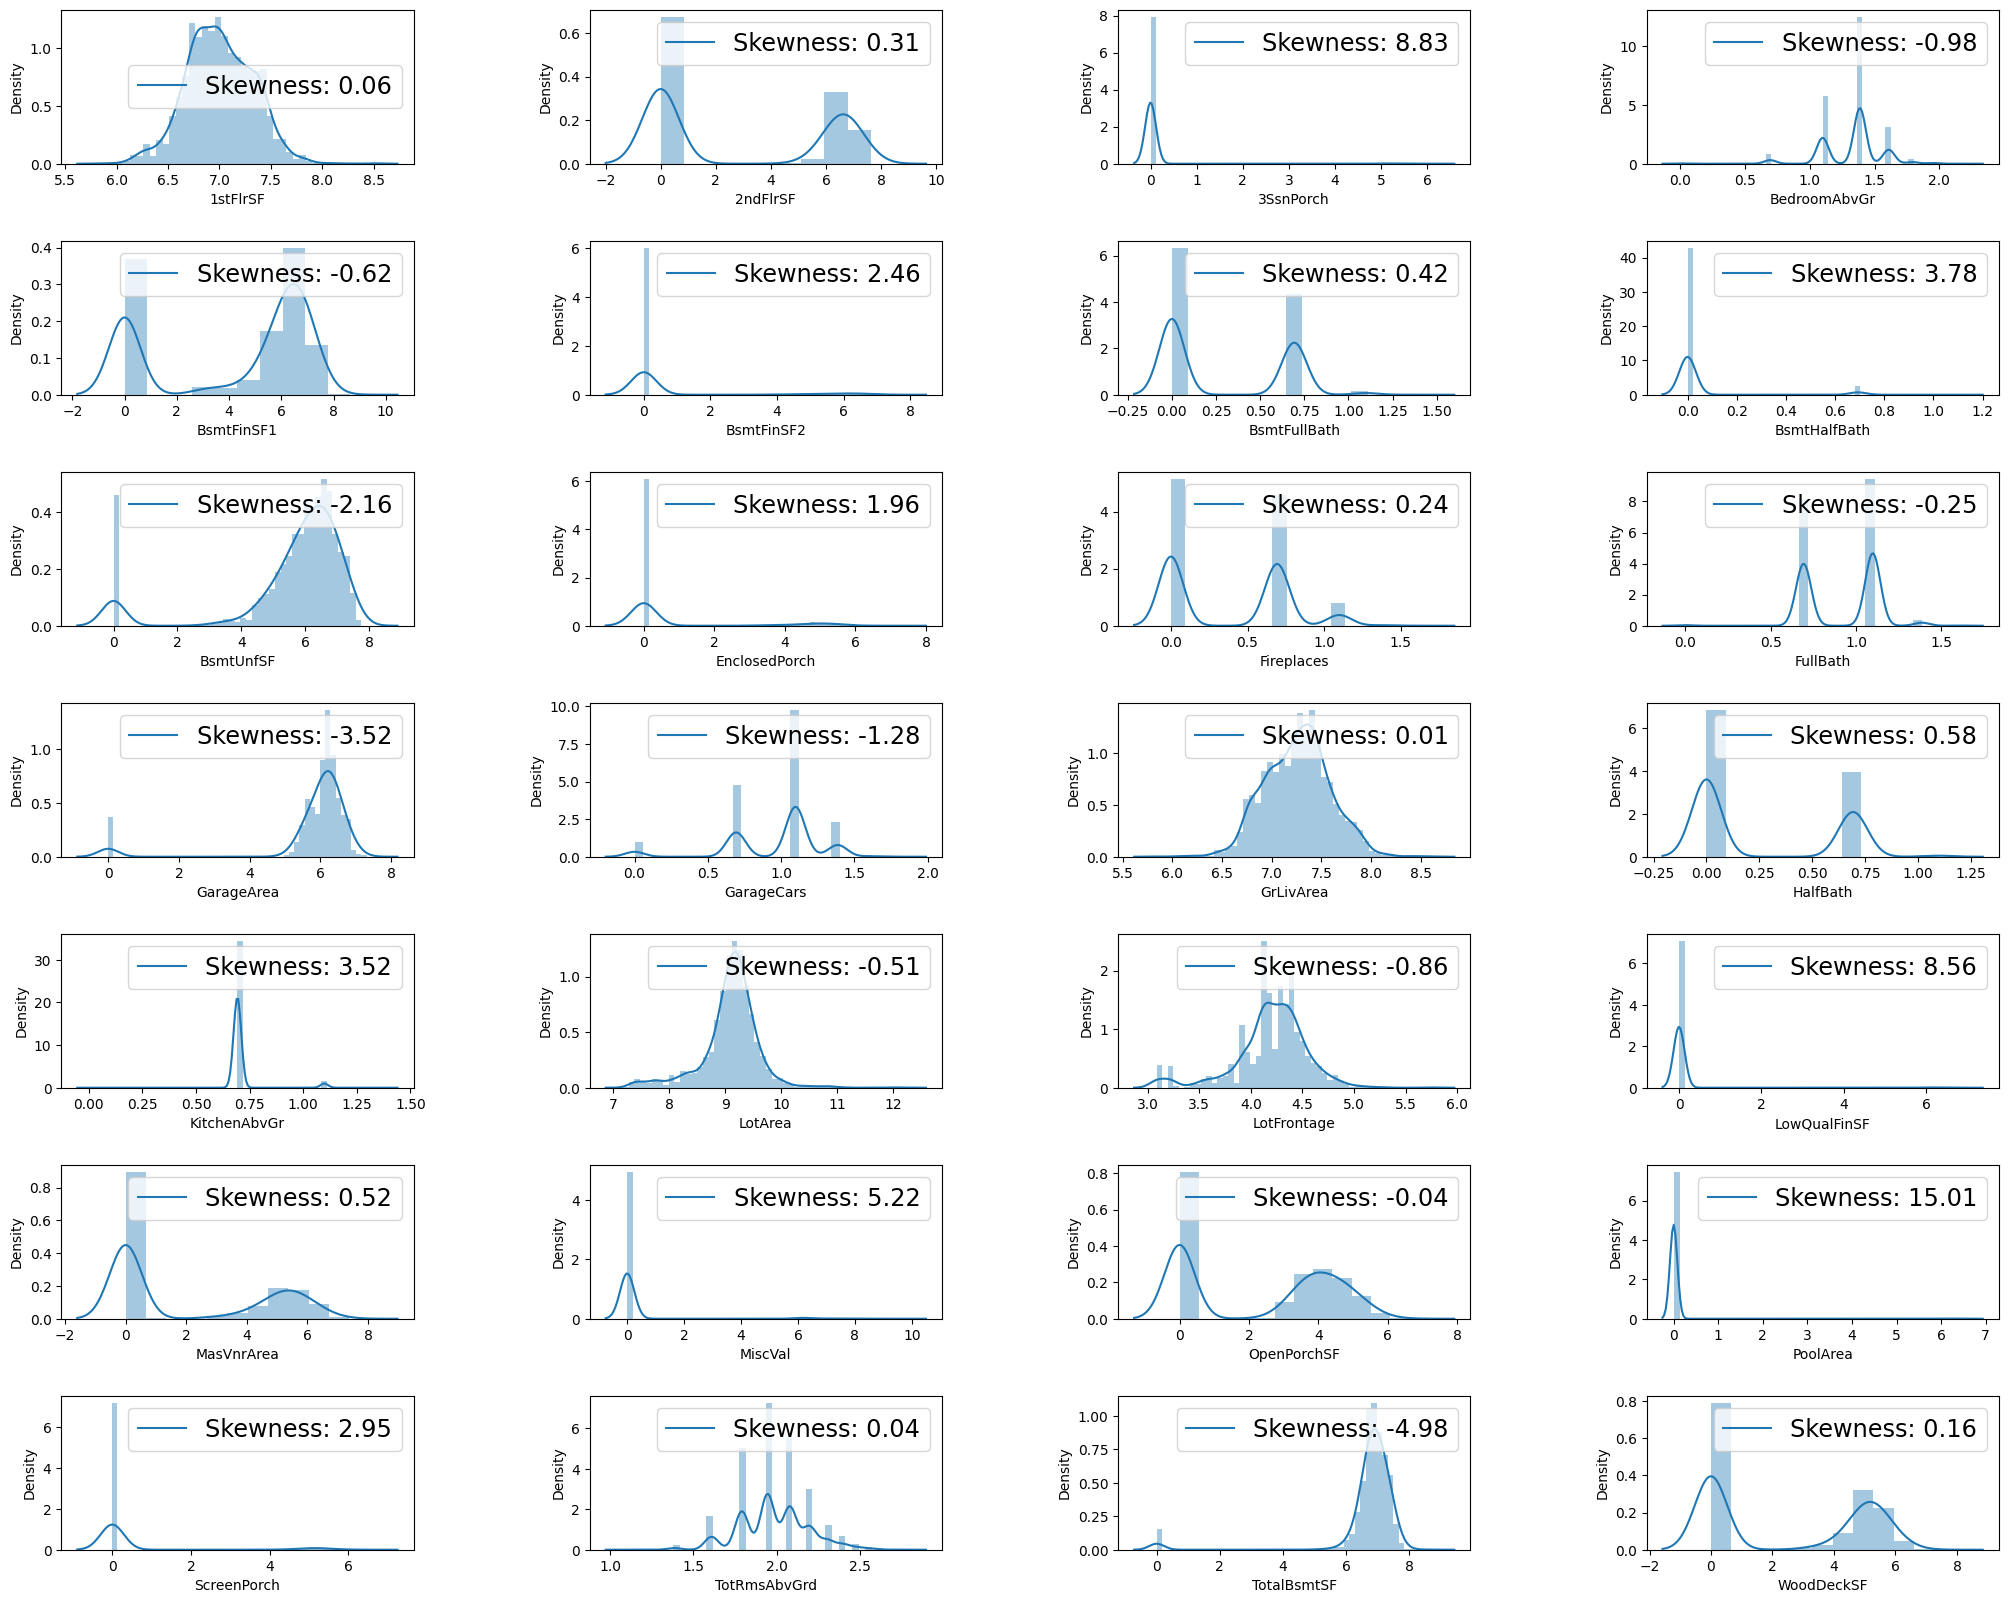

In [168]:

plt.figure(figsize=(25,20))
for i in range(len(skewed_features)):
    if i <= 28:
        plt.subplot(7,4,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        ax = sns.distplot(df_mvi[skewed_features[i]])
        ax.legend(["Skewness: {:.2f}".format(df_mvi[skewed_features[i]].skew())], fontsize = 'xx-large')

In [169]:
df_back = df_mvi

In [170]:
# decrease the skewnwnes of the data
for i in skewed_features:
    df_mvi[i] = np.log(df[i] + 1)

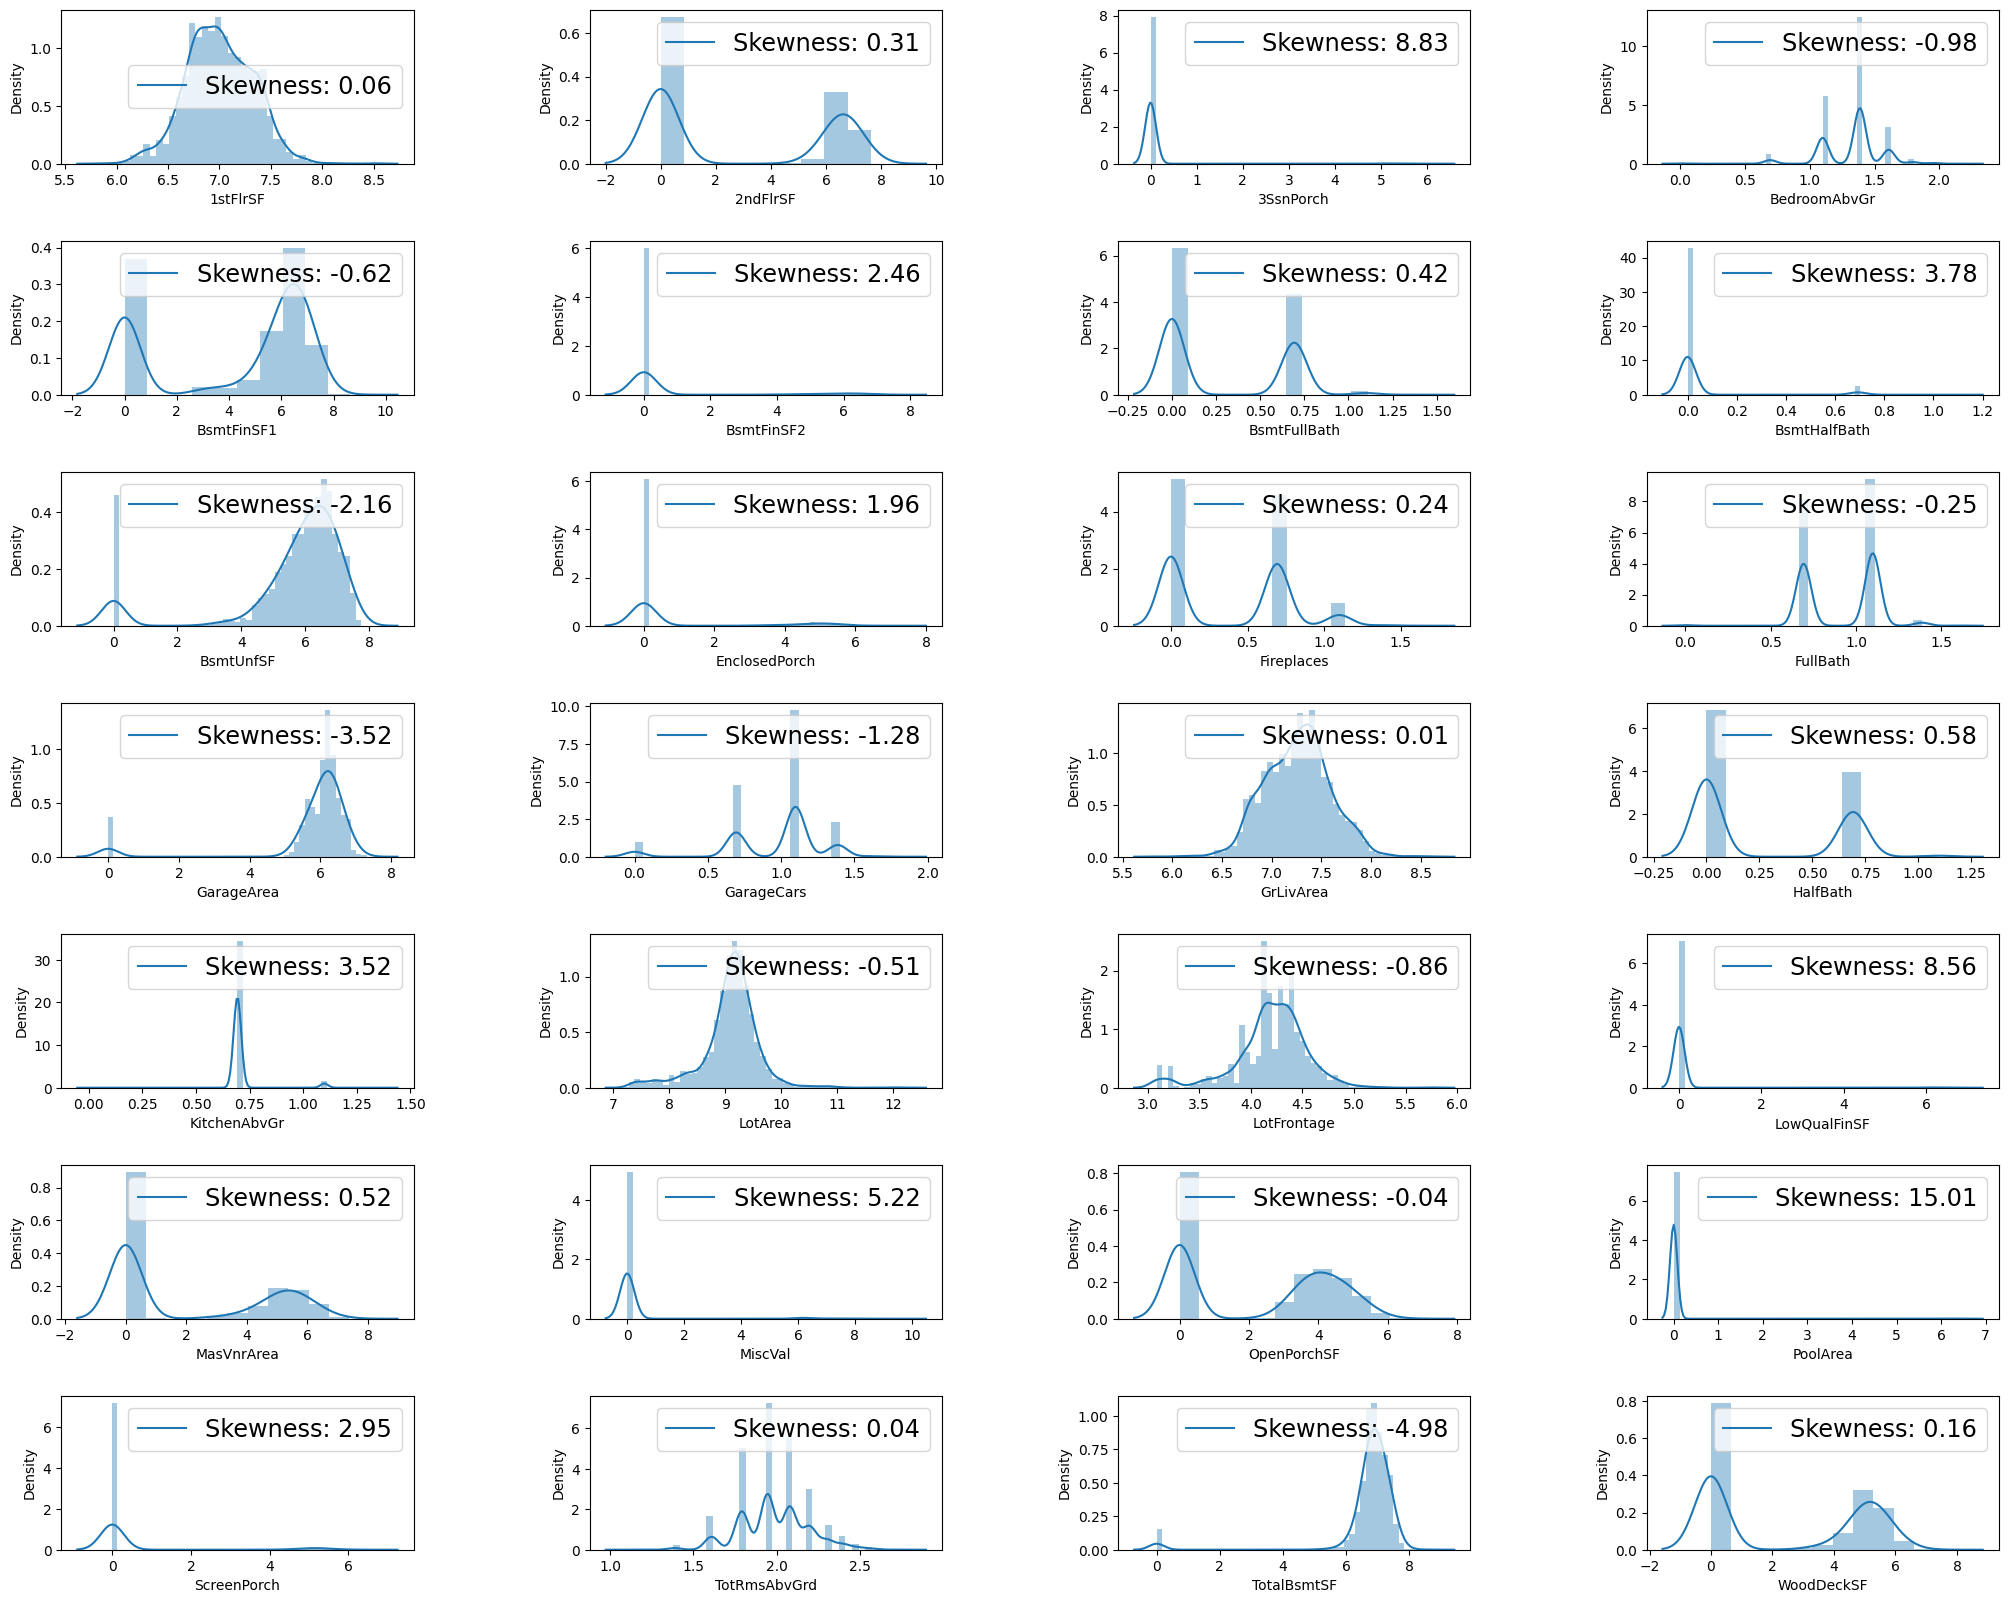

In [171]:
plt.figure(figsize=(25,20))
for i in range(len(skewed_features)):
    if i <= 28:
        plt.subplot(7,4,i+1)
        plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
        ax = sns.distplot(df_mvi[skewed_features[i]])
        ax.legend(["Skewness: {:.2f}".format(df_mvi[skewed_features[i]].skew())], fontsize = 'xx-large')

## Split Data for Training & Testing

In [134]:
df_encoding.shape

(2919, 515)

In [136]:
len_train=df_train.shape[0]
len_train

1460

In [141]:
x_train=df_encoding[:len_train].drop("SalePrice",axis=1)
y_train=df_encoding["SalePrice"][:len_train]

x_test=df_encoding[:len_train].drop("SalePrice",axis=1)


print("shape of x_test data",x_train.shape)
print("shape of x_test data",y_train.shape)
print("shape of x_test data",x_test.shape)


shape of x_test data (1460, 514)
shape of x_test data (1460,)
shape of x_test data (1460, 514)


## Feature Scaling

In [144]:
Sc=StandardScaler()

Sc.fit(x_train)

# Formula z=(x-u)/s   standard deviation

,copy,True
,with_mean,True
,with_std,True


In [145]:
x_train=Sc.transform(x_train)
x_test=Sc.transform(x_test)


In [146]:
x_train[:3,:]

array([[-0.22335706, -0.20714171,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.45789401, -0.09188637,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.08710685,  0.07347998,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [147]:
x_test[:3,:]


array([[-0.22335706, -0.20714171,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [ 0.45789401, -0.09188637,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503],
       [-0.08710685,  0.07347998,  0.02618016, ..., -0.11785113,
         0.4676514 , -0.30599503]])

In [148]:
Sc.mean_

array([6.99179459e+01, 1.05168281e+04, 2.99726027e+00, 6.09931507e+00,
       5.57534247e+00, 1.03117123e+02, 3.48904110e+00, 1.93493151e+00,
       1.63013699e+00, 3.54589041e+00, 4.43639726e+02, 1.24726027e+00,
       4.65493151e+01, 5.67240411e+02, 1.05742945e+03, 3.14520548e+00,
       1.16262671e+03, 3.46992466e+02, 5.84452055e+00, 1.51546370e+03,
       4.25342466e-01, 5.75342466e-02, 1.56506849e+00, 3.82876712e-01,
       2.86643836e+00, 1.04657534e+00, 2.51164384e+00, 6.51780822e+00,
       6.84178082e+00, 6.13013699e-01, 1.71575342e+00, 1.76712329e+00,
       4.72980137e+02, 2.81027397e+00, 2.80890411e+00, 1.85616438e+00,
       9.42445205e+01, 4.66602740e+01, 2.19541096e+01, 3.40958904e+00,
       1.50609589e+01, 2.75890411e+00, 1.02739726e-02, 4.34890411e+01,
       0.00000000e+00, 4.31506849e-02, 6.84931507e-03, 2.05479452e-02,
       3.67123288e-01, 4.72602740e-02, 2.73972603e-03, 8.21917808e-03,
       9.86301370e-02, 2.04794521e-01, 4.10958904e-02, 1.09589041e-02,
      

In [151]:
Sc.n_features_in_

514

In [152]:
Sc.n_samples_seen_

1460

In [189]:
#Sc.scale_

## Train ML Model Building

In [203]:
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor

from xgboost import XGBRegressor

In [204]:
x_train=df_encoding[:len_train].drop("SalePrice",axis=1)
y_train=df_encoding["SalePrice"][:len_train]

x_test=df_encoding[:len_train].drop("SalePrice",axis=1)

In [205]:
svr=SVR()
lr=LinearRegression()
sgdr=SGDRegressor()
knr=KNeighborsRegressor()
gpr=GaussianProcessRegressor()
dtr=DecisionTreeRegressor()
gbr=GradientBoostingRegressor()
rfr=RandomForestRegressor()
xgbr=XGBRegressor()


In [206]:
models={
    "1":["LinearRegressor",lr],
    "2":["SGDRegressor",sgdr],
    "3":["KNeighborsRegressor",knr],
    "4":["GaussianProcessRegressor",gpr],
    "5":["DecisionTreeRegressor",dtr],
    "6":["GradientBoostingRegressor",gbr],
    "7":["RandomForestRegressor",rfr],
    "8":["XGBRegressor",xgbr],
    "9":["SVR",svr],
  
   
    
}

## Cross Validation

In [207]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import make_scorer, r2_score

def test_model(model, x_train=x_train, y_train=y_train):
    cv = KFold(n_splits = 7, shuffle=True, random_state = 45)
    r2 = make_scorer(r2_score)
    r2_val_score = cross_val_score(model, x_train, y_train, cv=cv, scoring = r2)
    score = [r2_val_score.mean()]
    return score

In [208]:
models_score = []

for model in models:
    print("Training model:", models[model][0])
    score = test_model(models[model][1], x_train, y_train)
    print("Score of model:", score)


    models_score.append([models[model][0], score])


Training model: LinearRegressor
Score of model: [0.5937398746595344]
Training model: SGDRegressor
Score of model: [-1.1320337351722698e+24]
Training model: KNeighborsRegressor
Score of model: [0.6520273739437108]
Training model: GaussianProcessRegressor
Score of model: [-5.394770319095635]
Training model: DecisionTreeRegressor
Score of model: [0.6735836520434767]
Training model: GradientBoostingRegressor
Score of model: [0.8701381117429083]
Training model: RandomForestRegressor
Score of model: [0.8483359882569628]
Training model: XGBRegressor
Score of model: [0.8665915022147078]
Training model: SVR
Score of model: [-0.052031026122616675]


## Decision Tree Regressor

In [185]:
from sklearn.tree import DecisionTreeRegressor
dt_reg = DecisionTreeRegressor(random_state=21)
test_model(dt_reg)

[0.6487872762254661]

# Random Forest Regressor

In [186]:
from sklearn.ensemble import RandomForestRegressor
rf_reg = RandomForestRegressor(n_estimators = 1000, random_state=51)
test_model(rf_reg)

[0.8343806078346615]

 # Bagging & boosting

In [216]:
from sklearn.ensemble import BaggingRegressor, GradientBoostingRegressor
br_reg = BaggingRegressor(n_estimators=1000, random_state=51)
gbr_reg = GradientBoostingRegressor(n_estimators=1000, learning_rate=0.1, loss='ls', random_state=51)

In [217]:
test_model(br_reg)

[0.846956692412966]

# XGBoost

In [221]:
import xgboost
#xgb_reg=xgboost.XGBRegressor()
xgb_reg = xgboost.XGBRegressor(bbooster='gbtree', random_state=51)
test_model(xgb_reg)

[0.8665915022147078]

In [222]:
xgb2_reg=xgboost.XGBRegressor(n_estimators= 899,
 mon_child_weight= 2,
 max_depth= 4,
 learning_rate= 0.05,
 booster= 'gbtree')

test_model(xgb2_reg)

[0.8691085226092723]

# Solution

In [234]:
xgb2_reg.fit(x_train,np.log(y_train))
y_pred = np.exp(xgb2_reg.predict(x_test)).round(2)
submit_test = pd.concat([df_test['Id'],pd.DataFrame(y_pred)], axis=1)
submit_test.columns=['Id', 'SalePrice']
submit_test.to_csv('sample_submission.csv', index=False)
submit_test


,Id,SalePrice
0,1461.0,202474.140625
1,1462.0,177078.718750
2,1463.0,213602.187500
3,1464.0,149061.765625
4,1465.0,264198.531250
5,1466.0,142756.484375
6,1467.0,298975.281250
7,1468.0,206027.812500
8,1469.0,130884.312500
9,1470.0,123548.148438


# Model Save

In [236]:
from sklearn.svm import SVR
import pickle

# 1. Initialize and fit the model
svr_reg = SVR()
svr_reg.fit(x_train, y_train)  

# 2. Save the trained model
with open('model_house_price_prediction.pkl', 'wb') as f:
    pickle.dump(svr_reg, f)

# 3. Load the model
with open('model_house_price_prediction.pkl', 'rb') as f:
    model_house_price_prediction = pickle.load(f)

# 4. Predict
y_pred = model_house_price_prediction.predict(x_test)
